### Retinex model based stain normalization technique for whole slide image analysis 논문 기반에서 조금 보완 진행해봄

In [1]:
import os
import yaml
from pathlib import Path
from PIL import Image
from scipy import linalg
from scipy.ndimage import gaussian_filter

import numpy as np
import skimage
import matplotlib.pyplot as plt
from openslide import OpenSlide

from src.utils import *
from src.wsi_reader import WSIReader

In [2]:
config = load_config()
config

{'dataset_path': '/Users/cmkim/workspace/datasets/TIGER/'}

In [3]:
rgb = WSIReader(
    path=Path(config["dataset_path"]) / "wsibulk/images" / "119S.tif"
).read_array(
    level=32
)

In [4]:
transmission = skimage.util.img_as_float(rgb, force_copy=True)
np.maximum(transmission, 1e-6, out=transmission)

array([[[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       ...,

       [[0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0

In [5]:
od = np.log(transmission) / np.log(1e-6)
od

array([[[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       [[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       [[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       ...,

       [[0.00622072, 0.00746872, 0.0071547 ],
        [0.00622072, 0.00746872, 0.0071547 ],
        [0.00622072, 0

In [6]:
stain_matrix = StainConcentrationMatrix.hed()

In [7]:
stains = od @ linalg.inv(stain_matrix)
# np.maximum(stains, 0, out=stains)

### illumination map

In [8]:
tmap = np.max(stains, axis=2)
tmap

array([[0.00798515, 0.00798515, 0.00798515, ..., 0.00763391, 0.00881215,
        0.00881215],
       [0.00798515, 0.00798515, 0.00798515, ..., 0.00763391, 0.00881215,
        0.00881215],
       [0.00798515, 0.00798515, 0.00798515, ..., 0.00763391, 0.00881215,
        0.00881215],
       ...,
       [0.00688698, 0.00688698, 0.00688698, ..., 0.00763391, 0.00881215,
        0.00881215],
       [0.00919314, 0.00919314, 0.00919314, ..., 0.00876638, 0.00996012,
        0.00996012],
       [0.0084328 , 0.0084328 , 0.0084328 , ..., 0.00763391, 0.00881215,
        0.00881215]], shape=(1356, 1736))

In [9]:
tmap_gradh = np.gradient(tmap, axis=1)
tmap_gradv = np.gradient(tmap, axis=0)

In [10]:
tmap_gradh, tmap_gradv

(array([[0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00059687, 0.00059687,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00058912, 0.00058912,
         0.        ]], shape=(1356, 1736)),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.00059168,  0.00059168,  0.00059168, ...,  0.00018956,
    

In [60]:
epsilon = 1e-4

In [61]:
gaussian = gaussian_filter(tmap, sigma=6)
gaussian

array([[0.00799476, 0.00799624, 0.00799922, ..., 0.00791716, 0.00793277,
        0.0079409 ],
       [0.00799396, 0.00799541, 0.00799834, ..., 0.00791716, 0.00793277,
        0.0079409 ],
       [0.0079923 , 0.0079937 , 0.00799653, ..., 0.00791716, 0.00793277,
        0.0079409 ],
       ...,
       [0.00799526, 0.00799331, 0.00798948, ..., 0.00819299, 0.00820217,
        0.00820703],
       [0.00800671, 0.00800481, 0.00800106, ..., 0.00820652, 0.0082153 ,
        0.00821995],
       [0.0080126 , 0.00801072, 0.00800703, ..., 0.00821355, 0.00822213,
        0.00822667]], shape=(1356, 1736))

In [62]:
wh = np.sum(gaussian / (gaussian * tmap_gradh + epsilon), axis=1, keepdims=True)
wv = np.sum(gaussian / (gaussian * tmap_gradv + epsilon), axis=0, keepdims=True)

In [63]:
wh, wv

(array([[-2242532.31881641],
        [  242910.1122126 ],
        [  147413.67186785],
        ...,
        [  147460.36533726],
        [  147646.43390465],
        [  148659.52797529]], shape=(1356, 1)),
 array([[-120032.10656881,  207281.61268178,  147133.64434106, ...,
          111891.79164607,  111938.16015984,  111936.13776604]],
       shape=(1, 1736)))

In [64]:
tmap_adj = tmap / (wh + wv + epsilon)
tmap_adj

array([[-3.37986625e-09, -3.92342415e-09, -3.81080310e-09, ...,
        -3.58291896e-09, -4.13600392e-09, -4.13600000e-09],
       [ 6.49843861e-08,  1.77372247e-08,  2.04724512e-08, ...,
         2.15159847e-08,  2.48335598e-08,  2.48337013e-08],
       [ 2.91625101e-07,  2.25127091e-08,  2.71099118e-08, ...,
         2.94398438e-08,  3.39775730e-08,  3.39778379e-08],
       ...,
       [ 2.51090589e-07,  1.94140477e-08,  2.33778606e-08, ...,
         2.94345435e-08,  3.39714568e-08,  3.39717216e-08],
       [ 3.32911803e-07,  2.59014063e-08,  3.11864207e-08, ...,
         3.37768409e-08,  3.83694499e-08,  3.83697488e-08],
       [ 2.94570871e-07,  2.36915701e-08,  2.85091249e-08, ...,
         2.92990738e-08,  3.38151342e-08,  3.38153966e-08]],
      shape=(1356, 1736))

In [65]:
tmap_adj = (tmap_adj - np.min(tmap_adj)) / (np.max(tmap_adj) - np.min(tmap_adj))
tmap_adj

array([[0.84249748, 0.84249747, 0.84249748, ..., 0.84249748, 0.84249747,
        0.84249747],
       [0.84249787, 0.8424976 , 0.84249762, ..., 0.84249762, 0.84249764,
        0.84249764],
       [0.84249918, 0.84249763, 0.84249765, ..., 0.84249767, 0.84249769,
        0.84249769],
       ...,
       [0.84249894, 0.84249761, 0.84249763, ..., 0.84249767, 0.84249769,
        0.84249769],
       [0.84249941, 0.84249765, 0.84249768, ..., 0.84249769, 0.84249772,
        0.84249772],
       [0.84249919, 0.84249763, 0.84249766, ..., 0.84249767, 0.84249769,
        0.84249769]], shape=(1356, 1736))

In [66]:
stains_adj = stains * tmap_adj[..., np.newaxis]
stains_adj

array([[[ 0.00672747, -0.00072022,  0.0053858 ],
        [ 0.00672747, -0.00072022,  0.0053858 ],
        [ 0.00672747, -0.00072022,  0.0053858 ],
        ...,
        [ 0.00643155, -0.00128043,  0.00625402],
        [ 0.00742421, -0.00181752,  0.00596084],
        [ 0.00742421, -0.00181752,  0.00596084]],

       [[ 0.00672747, -0.00072022,  0.00538581],
        [ 0.00672747, -0.00072022,  0.0053858 ],
        [ 0.00672747, -0.00072022,  0.0053858 ],
        ...,
        [ 0.00643155, -0.00128043,  0.00625402],
        [ 0.00742421, -0.00181752,  0.00596084],
        [ 0.00742421, -0.00181752,  0.00596084]],

       [[ 0.00672748, -0.00072022,  0.00538581],
        [ 0.00672747, -0.00072022,  0.0053858 ],
        [ 0.00672747, -0.00072022,  0.0053858 ],
        ...,
        [ 0.00643155, -0.00128043,  0.00625402],
        [ 0.00742421, -0.00181752,  0.00596084],
        [ 0.00742421, -0.00181752,  0.00596084]],

       ...,

       [[ 0.00580227, -0.00109669,  0.00577774],
        [ 0

In [67]:
null = np.zeros_like(stains[:, :, 0])

In [68]:
hematoxylin = skimage.color.hed2rgb(np.stack((stains[:, :, 0], null, null), axis=-1))
eosin = skimage.color.hed2rgb(np.stack((null, stains[:, :, 1], null), axis=-1))
dab = skimage.color.hed2rgb(np.stack((null, null, stains[:, :, 2]), axis=-1))

In [69]:
hematoxylin_adj = skimage.color.hed2rgb(np.stack((stains_adj[:, :, 0], null, null), axis=-1))
eosin_adj = skimage.color.hed2rgb(np.stack((null, stains_adj[:, :, 1], null), axis=-1))
dab_adj = skimage.color.hed2rgb(np.stack((null, null, stains_adj[:, :, 2]), axis=-1))

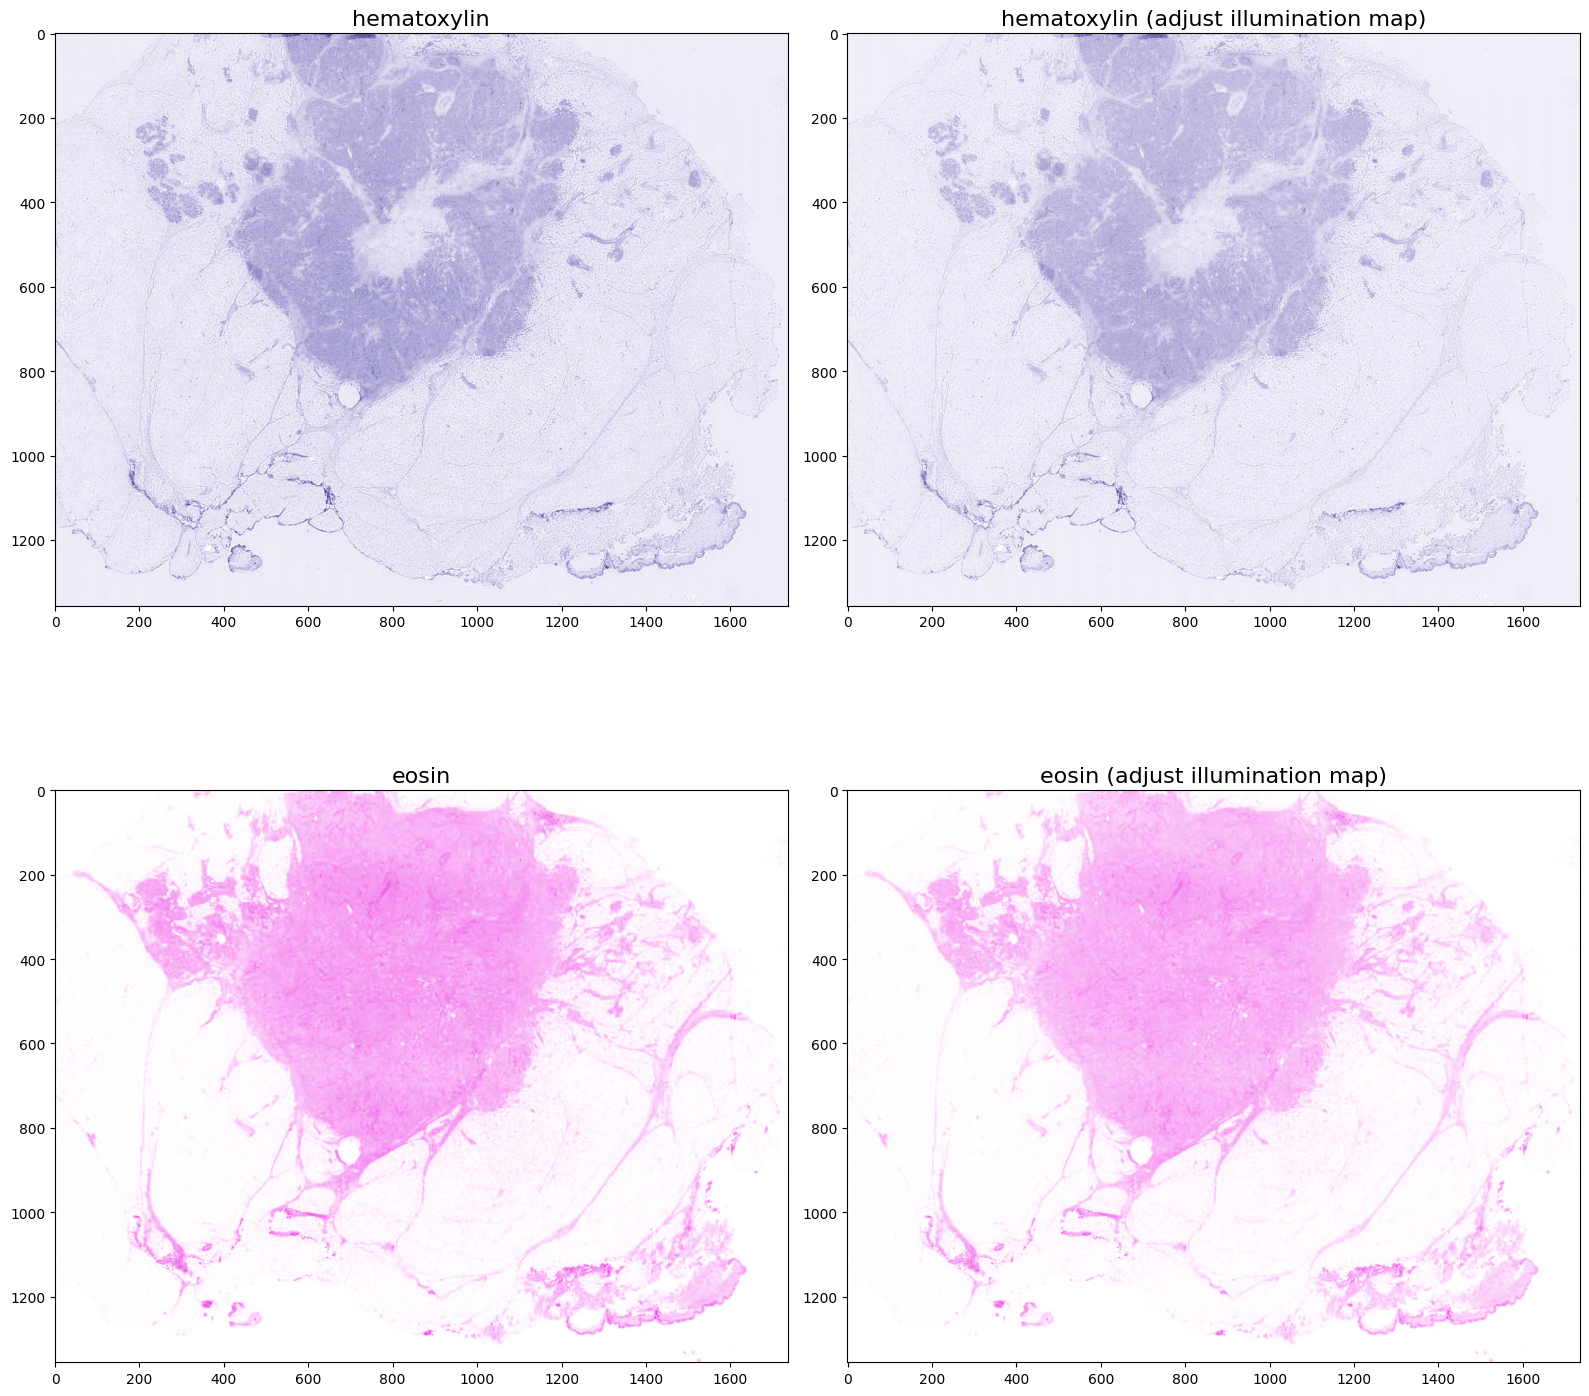

In [70]:
fontdict={
    "fontsize": 16
}

fig = plt.figure(figsize=(16, 16))

ax = fig.add_subplot(221)
ax.imshow(hematoxylin)
ax.set_title(label="hematoxylin", fontdict=fontdict)

ax = fig.add_subplot(222)
ax.imshow(hematoxylin_adj)
ax.set_title(label="hematoxylin (adjust illumination map)", fontdict=fontdict)

ax = fig.add_subplot(223)
ax.imshow(eosin)
ax.set_title(label="eosin", fontdict=fontdict)

ax = fig.add_subplot(224)
ax.imshow(eosin_adj)
ax.set_title(label="eosin (adjust illumination map)", fontdict=fontdict)

fig.tight_layout()
plt.show()